# QuaSaR: Identifying EEW Rings
Quake Safe Rings (synonimus with [QuSaR](https://en.wikipedia.org/wiki/Quasar)) are essentially autonomous [Rings](https://brilliant.org/wiki/ring-theory/) of sensors sharing time-series of discretized _waveform_ information to detect threats and forewarn to give man and machine a lead time to respond to harmful earthquakes.

The __EEW rings must poses two key properties__; thus, they are rings of
1. [self-healing](https://medium.com/lansaar/what-are-self-healing-systems-42ac9dd0e0aa) and [self-aligning](https://encyclopedia2.thefreedictionary.com/Self-Aligning+System) closed and complete sheild networks that offer a collection of reliable low-latency EEW applications
1. [resilient sharing economies](https://collections.unu.edu/eserv/UNU:7295/Ryu2019_Article_WhatAndHowAreWeSharingASystema.pdf) that support the organizational, application, hardware, and communication interconnections

It is a way for shifting from the paradigm of Government funded public good of national shield networks to a sharing economy of [self-organazing](https://encyclopedia2.thefreedictionary.com/Self-Organizing+System) approach to offer EEW applications. Before citizens can organize to offer community-based EEW applications, they must realize the reliability and the cost benifits of investing in an EEW application. For such the benificiaries should be able to:
1. Assess and perceive their [earthquake risk]() and identify necessary and sufficient EEW applications
1. Agree on the ideal [micro-array shield network]() that supports their EEW applications
1. Calculate the resilience of the shield network supporting the EEW applications

To that end, as a resource I am presenting a seiries of notebooks that examine the particular components for building a potential ideal micro-array shield networks that are augmented with existing shield networks. In this example, I use the GeoNet shield network and the seismograms as the basis for analaysis. The notebooks present the standard [data mining](https://www.wideskills.com/data-mining-tutorial) applied on the GeoNet data to extract insigts.

## GOAL AND OBJECTIVES
The overall __gaol__ is to examine how the GeoNet seismic network can be augmented with a low-cost network to offer low-latency EEWs by making use of cutting-edge earthquake picking algorithms and machine learning techniques. The expected outcome is for the findings to serve as evidence for supporting a strategic deployment of a ring or rings of micro-array networks. 

The intent is to also make use of the analysis and tools is to serve as inputs for [earthquake hazard risk assessment](https://www.usgs.gov/natural-hazards/earthquake-hazards/hazard-and-risk-assessment). Thereby, a community interested in operationalizing their own micro-array ring can make us of the analysis and tools to determining whether or not and how they may need to invest in building a micro-array ring.

### Objectives
1. _Understand the [topology](https://brilliant.org/wiki/topology/) (structure of connection of the units and their capabilities)_; also an axiomatic way to make sense of when two points in a set are "near" each other
   1. Retrieve data on all the operational NZ seismic stations to __map the inventory__ by types and location [git-issue #2](https://github.com/waidyanatha/quasar/issues/2).
   1. Build a __station fault topology space__ (and a tensor product) comprising all the operational stations within a bound of the fault line paths; such that we create a metric space _(X,d)_ comprising _X = { x,y | for all coordinate pairs of stations x and faults y}_ and a [haversine](https://math.stackexchange.com/questions/993236/calculating-a-perpendicular-distance-to-a-line-when-using-coordinates-latitude) distance function _d = x - y_; relative to the fault lines, stations, and earthquake detection role and capacity 
   1. Cluster the metric space into partially ordered __coarser topology__ of metric subspaces; essentially to make a nearest neigbour map of station fault clusters such that stations are within ___d < &epsilon;___ distance to ensure optimal EEW application performance; 
1. _Apply earthquake __picking algorithms__ on clusters of GeoNet wave form data_
   1. Test __standard GeoNet algorithms__ (e.g. LTS/STS, Pd, Wavefields) on each of the cluster of stations serving as rings of micro-array shield networks to determine strengths and weaknesses of each cluster.
   1. Similarly, test with new __machine learning and wavefield algorithms__ (e.g. , 8bit Picking, PLUM) to repeat the exercise as above
   1. Test above picking algorithms with __simulated earthquakes__ and for __selected high risk faults__ to observe the response of the picking algorithms
   
1. _Determine ways for improving the station rings for an incremental effectiveness of EEW_
   1. Propose to __fit additional stations__ to improve the 30Km nearest neighbour cluster; then show how that improves the picking
   1. Apply the geodedic methodology to __interpolate seismic data__ for the proposed station locations 
   1. Try the earthquake __picking algorithms__ on the hypothetical network to measure effectiveness

The each of the __notebooks__, labeled 1.A - 3.C are associated with the corresponding objectives, listed above, to further discuss the theory, methods, and outcomes of the analysis.

| Notebook | Notebook | Notebook |
| :- | :- | :- |
|* 1a: [Shield Network Clustering](1a_shield_network_cluster_maps.ipynb) |* 2a: [Wave form analysis](2a_standarad_wafeform_analysis.ipynb) |* 3a: [To be done]() |
|* 1b: [Station-Fault proximity plots](1b_station_fault_proximity_plots.ipynb) |* 2b: [To be done]() | * 3b: [To be done]()|
|* 1c: [Nearest neigbour clustering](1c_nearest_neighbour_cluster_maps.ipynb) |* 2c: [Strong motion classification](2c_strong_motion_classification.ipynb) |* 3c: [To be done]() |


 Technologies and Data Sources


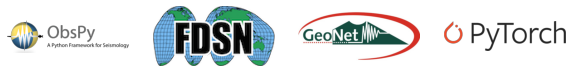

In [33]:
import warnings
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
'''
    WARNING CONTROL to display or ignore all warnings
    change values to 'default' and 'ignore', if as you desire to activate or stop warnings 
'''
warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) #remove all the deprecation warnings

logos = []
logos.append(mpimg.imread('../images/obspy_logo.png'))
logos.append(mpimg.imread('../images/fdsn_logo.png'))
logos.append(mpimg.imread('../images/geonet_logo.jpg'))
logos.append(mpimg.imread('../images/pytorch_logo.png'))

plt.figure(figsize=(10,10))
#plt.suptitle(' technologies and data sources ', fontsize=30)
print(' Technologies and Data Sources')
columns = 4
for i, logo in enumerate(logos):
    plt.subplot(len(logos) / columns + 1, columns, i + 1)
    plt.imshow(logo)
    plt.axis('off')


In [11]:
from IPython.display import IFrame
IFrame('https://statsnz.maps.arcgis.com/apps/MapSeries/index.html?appid=3a61db9ab16d435b91b3997ed3a4b634', width=900, height=600)

# RESOURCES
1. [Global data services and standards](http://www.fdsn.org/services/) offered by the International Federation Data of Seismic Networks (FDSN). 
1. GEONET resources:
   1. [Stream Naming Conventions](https://www.geonet.org.nz/data/supplementary/channels) are based on historical usage together with recommendations from the [SEED manual](https://www.fdsn.org/seed_manual/SEEDManual_V2.4.pdf)
   1. [Python tutorials](https://www.geonet.org.nz/data/tools/Tutorials) for using GeoNet resources
1. [Seismo-Live](https://krischer.github.io/seismo_live_build/html/Workshops/2017_Baku_STCU_IRIS_ObsPy_course/07_Basic_Processing_Exercise_solution_wrapper.html) examples of get station waveform, inventory, event, arrival time, response, and plotting using obspy
1. Choosing [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) over KMeans: 
   1. Discussion of the [three clustering methods](https://realpython.com/k-means-clustering-python/): K means, hierachical, and density-based clustering
   1. Fundermentally KMeans requires us to first select the number of clusters we wish to find and DBSCAN doesn't.
   1. [clustering to reduce spatial data sizes](https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/) KMeans is not an ideal algorithm for latitude-longitude spatial data because it minimizes variance, not geodetic distance. 
   1. [Explanation of DBSCAN clustering](https://towardsdatascience.com/explaining-dbscan-clustering-18eaf5c83b31) also identifies a drawback of KMeans clustering as it is vulnerable to outliers and outliers have a significant impact on the way the centroids moves.
1. [Example of scikit-learn DBSCAN](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html)
1. [obspy.geodetics](https://docs.obspy.org/packages/obspy.geodetics.html) - various geodetic utilities for ObsPy - try an alternative clustering method with obspy geodetics
1. Mapping tutorials
   1. Visualization: [Mapping Global Earthquake Activity](http://introtopython.org/visualization_earthquakes.html)
   1. Plotting data on a map [(Example Gallery)](https://matplotlib.org/basemap/users/examples.html)
1. Calculating a [perpendicular distance to a line](https://math.stackexchange.com/questions/993236/calculating-a-perpendicular-distance-to-a-line-when-using-coordinates-latitude), when using coordinates (latitude & longitude)
1. Apply the [moment tensor](https://earthquake.usgs.gov/learn/glossary/?term=moment%20tensor); especially, the Seismic Moment Tensor Inversion (SMTI) analysis when computing fault line movement and picking the stations that might be first triggered because the [moment tensor would determine the intensity and wave propogation characteristics](https://www.esgsolutions.com/technical-resources/microseismic-knowledgebase/what-is-a-moment-tensor). 